In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('C:/Users/lilly/Downloads/7.1, 7.2 Feature Selection (review)/learningSet.csv')

C:\Users\lilly\AppData\Local\Temp\ipykernel_17948\1444879928.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/lilly/Downloads/7.1, 7.2 Feature Selection (review)/learningSet.csv')


In [3]:
print(data.shape)
data.head(10)

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [4]:
data['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [5]:
data['TARGET_D'].describe()

count    95412.000000
mean         0.793073
std          4.429725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: TARGET_D, dtype: float64

In [6]:
95412 * (0.793 - 0.68) # (mean donation for all people minus cost of mailing piece) * number of mailing pieces

10781.555999999999

In [7]:
data[data['TARGET_B']==1]['TARGET_D'].describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

In [8]:
4843 * (15.62 - 0.68) # (mean donation for all people who made a donation minus cost of mailing piece) * number of mailing pcs

72354.42

In [9]:
data['AVGGIFT'].describe()

count    95412.000000
mean        13.347786
std         10.769997
min          1.285714
25%          8.384615
50%         11.636364
75%         15.477955
max       1000.000000
Name: AVGGIFT, dtype: float64

To solve this problem we will first build a classification model to predict who will more likely respond and then for those respondents, we will build a regression model to predict the donation amount.

Then we can use the cost matrix to calculate the total benefit from the donations

Some of the challenges with the dataset are as follows:

- Large number of features: The data set has over 450 features. Hence selecting the right features for the model is very critical and at the same time it is not easy as the same traditional ways of removing features is not effective given the large number of features. Apart from feature selection, feature extraction (creating your own features using the existing features) is also not easy in this case.
- Sparsity of the dataset: There are a lot of features with a large number of null values.
- Data imbalance: For developing a classification, there is a huge imbalance in the training dataset with only approximately 5000 values for one category as compared to cover 95,000 instances for the other category.

In [10]:
nulls_percent_df = pd.DataFrame(data.isna().sum()*100/len(data)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.138347


In [11]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,24.802960
23,NUMCHLD,87.018404
24,INCOME,22.309563
26,WEALTH1,46.882992
28,MBCRAFT,55.395548
...,...,...
455,RAMNT_24,81.409047
466,NEXTDATE,10.452564
467,TIMELAG,10.452564
479,CLUSTER2,0.138347


In [12]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(60)

,column_name,nulls_percentage
16,AGE,24.802960
23,NUMCHLD,87.018404
24,INCOME,22.309563
26,WEALTH1,46.882992
28,MBCRAFT,55.395548
29,MBGARDEN,55.395548
30,MBBOOKS,55.395548
31,MBCOLECT,55.458433
32,MAGFAML,55.395548
33,MAGFEM,55.395548


In [13]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].tail(32)

,column_name,nulls_percentage
428,RDATE_19,83.359535
429,RDATE_20,91.732696
430,RDATE_21,90.029556
431,RDATE_22,78.123297
432,RDATE_23,91.763091
433,RDATE_24,81.409047
434,RAMNT_3,99.746363
435,RAMNT_4,99.705488
436,RAMNT_5,99.990567
437,RAMNT_6,99.186685


In [14]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>25]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 72, dtype: object

In [15]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


From the list above that includes the columns that have over 25% null values, you discussed with your manager you were told that the following columns are important -> wealth1, wealth2
We will remove these variables from the above list 
RDATE3, RAMNT_3 are important but they have too many null values 

# 7.01 Activity 2
## Remove columns with null values greater than a specified threshold

In [16]:
cols = ['WEALTH1', 'WEALTH2']
for item in cols:
    drop_columns_list.remove(item)  
print(drop_columns_list)

['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [17]:
len(drop_columns_list)

70

In [18]:
data = data.drop(drop_columns_list, axis=1)
data.shape

(95412, 411)

## More data cleaning

In [19]:
data.head(10)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,NaN,0,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,,,,XXXX,S1,14,46.0,E,H,,,,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,,,,9.0,2,,,,,,,,,,,,,,,,,,,,,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83

We can see that there are a lot of columns that have blank spaces which represent no value in this case. 
They were not identified as null values by python as they are empty spaces that are read as character values by 
python. We will replace those values by NaNs and repeat the analysis 

Before we do that we will replace the blank values from the column "MAILCODE" by "A" which would mean the address is okay (pl check the definition of the variable in the description)

In [20]:
data['MAILCODE'].unique()

array([' ', 'B'], dtype=object)

In [21]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))
#data['MAILCODE'] = np.where(data['MAILCODE']==" ";"A";data['MAILCODE'])

In [22]:
# Now we can replace the rest of the space characters with np.NaN

In [23]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [24]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,NaN,5202,0,NaN,NaN,NaN,NaN,XXXX,S1,14,46.0,E,H,NaN,NaN,NaN,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,NaN,NaN,NaN,9.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,

# 7.01 Activity 3
## Remove columns with null values greater than a specified threshold

In [25]:
nulls_percent_df_2 = pd.DataFrame(data.isna().sum()*100/len(data)).reset_index()
nulls_percent_df_2.columns = ['column_name', 'nulls_percentage']
nulls_percent_df_2.head()

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.972624
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000


In [26]:
columns_above_threshold_2 = nulls_percent_df_2[nulls_percent_df_2['nulls_percentage']>25]
print(len(columns_above_threshold_2['column_name']))

47


In [27]:
drop_columns_list_2 = list(columns_above_threshold_2['column_name'])
print(drop_columns_list_2)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'WEALTH1', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


We would again repeat the same exercise as the last time. We will discuss it with the team, manager, and/or other stakeholders to see which columns we need to retain here. 

Like last time we will keep the following -> wealth1, wealth2 along with these VETERANS, SOLIH

In [28]:
cols_2 = ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']
for item in cols_2:
    drop_columns_list_2.remove(item) 

In [29]:
data = data.drop(columns=drop_columns_list_2)
data.shape

(95412, 368)

In [30]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,DOB,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGE,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLIH,WEALTH2,VETERANS,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,3712,0,XXXX,T2,36,60.0,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,NaN,5.0,NaN,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,5202,0,XXXX,S1,14,46.0,H,6.0,M,9.0,16,3,0,15,55,11,6,2,1,NaN,9.0,NaN,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92

# 7.01 Lesson 4 key concepts
## Separating Target, Numerical Features, and Categorical Features

Since we have a huge number of features, it would be easier to work independently on numerical features and categorical features.

For the target variables, for now we will retain them both together. But later, we will build a classification model first where we would need the column TARGET_B only.

In [31]:
Y = data[['TARGET_B', 'TARGET_D']]
Y

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [32]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

In [33]:
numerical.shape

(95412, 335)

In [34]:
categorical = data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,XXXX,T2,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,0,XXXX,S1,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A
2,AMH,NC,27017,A,0,XXXX,R2,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C
3,BRY,CA,95953,A,0,XXXX,R2,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C
4,NaN,FL,33176,A,0,XXXX,S2,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A


In [35]:
categorical.shape

(95412, 31)

## Working with categorical columns

We will work with the categorical features first. Look at the columns one by one. Some of the operations which we will perform are:

- Replace null values with the most occurring categories
- Reduce the number of categories in a column by grouping

It is important to note that some columns are defined by python as categorical/object types. There might be other columns defined as numerical that we want as categorical. We will look them later when we were working on numerical types.

In [36]:
categorical.isna().sum()*100/len(categorical)

OSOURCE      0.972624
STATE        0.000000
ZIP          0.000000
MAILCODE     0.000000
NOEXCH       0.007337
MDMAUD       0.000000
DOMAIN       2.427368
CLUSTER      2.427368
HOMEOWNR    23.296860
GENDER       3.099191
DATASRCE    22.303274
SOLIH       93.501866
VETERANS    89.072653
RFA_2        0.000000
RFA_3        2.043768
RFA_4        2.423175
RFA_6        3.728043
RFA_7        9.300717
RFA_8        3.679831
RFA_9       11.785729
RFA_11      10.923154
RFA_12       9.352073
RFA_14      19.774242
RFA_16      21.398776
RFA_18      22.285457
RFA_2R       0.000000
RFA_2A       0.000000
MDMAUD_R     0.000000
MDMAUD_F     0.000000
MDMAUD_A     0.000000
GEOCODE2     0.334339
dtype: float64

## Categorical Variables

Here we will try to reduce the number of categories. An ideal way would have been to group the states into 
regions. But in this case we will group all the states with counts less than 2500 into one category "other"

In [37]:
categorical['STATE'].value_counts()

STATE
CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: count, dtype: int64

In [38]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
df
other_states = list(df[df['count']<2500]['state'])
other_states

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [39]:
categorical['STATE'].value_counts()

STATE
other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: count, dtype: int64

# 7.01 Lab | Revisiting Machine Learning Case Study

INTRODUCE LAB HERE

# 7.02

We will work on the column DOMAIN. Let's replace the null values with the category that is represented the most and then we will split the data into two columns DOMAIN_A and DOMAIN_B.

- DOMAIN_A will consist of the first character from the DOMAIN
- DOMAIN_B will consist of the second character from the DOMAIN

Then we will drop the original column DOMAIN

In [40]:
categorical['DOMAIN'].value_counts(dropna=False)

DOMAIN
R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: count, dtype: int64

In [41]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [42]:
s = 'R2'
s[0]

'R'

In [43]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

In [44]:
categorical[['DOMAIN','DOMAIN_A','DOMAIN_B']].head()

,DOMAIN,DOMAIN_A,DOMAIN_B
0,T2,T,2
1,S1,S,1
2,R2,R,2
3,R2,R,2
4,S2,S,2


In [45]:
categorical.DOMAIN_B.value_counts()

DOMAIN_B
2    48356
1    28498
3    16754
4     1804
Name: count, dtype: int64

In [46]:
categorical = categorical.drop(columns=['DOMAIN'])

In [47]:
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,A,0,XXXX,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T,2
1,BOA,CA,91326,A,0,XXXX,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A,S,1
2,AMH,NC,27017,A,0,XXXX,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C,R,2
3,BRY,CA,95953,A,0,XXXX,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C,R,2
4,NaN,FL,33176,A,0,XXXX,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A,S,2


### Activity 2.1

In [48]:
drop_list=[]

In [49]:
categorical['MAILCODE'].value_counts()

MAILCODE
A    94013
B     1399
Name: count, dtype: int64

In [50]:
drop_list.append('MAILCODE') # but remember to check mail code before actually sending out mail pieces

In [51]:
categorical['NOEXCH'].value_counts(dropna=False)

NOEXCH
0      61203
0      33882
1        195
1         90
X         35
NaN        7
Name: count, dtype: int64

In [52]:
drop_list.append('NOEXCH')


In [53]:
print(categorical['MDMAUD'].value_counts())
# Since most of the data is unknown (XXXX) here we will drop this column

MDMAUD
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: count, dtype: int64


In [54]:
drop_list.append('MDMAUD')
#End Activity

MDMAUD_XXX are also like MDMAUD



In [55]:
categorical['MDMAUD_R'].value_counts()

MDMAUD_R
X    95118
C      109
L       70
D       65
I       50
Name: count, dtype: int64

In [56]:
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

## Replacing NULL values

In [57]:
categorical['CLUSTER'].value_counts(dropna=False)

CLUSTER
40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: count, dtype: int64

In [58]:
categorical['CLUSTER'].sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '6', '7', '8', '9', nan], dtype=object)

In [59]:
sorted(categorical['CLUSTER'].unique())

TypeError: '<' not supported between instances of 'float' and 'str'

In [60]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40') # 'other' would also be a valid choice

In [61]:
categorical['HOMEOWNR'].value_counts(dropna=False)

HOMEOWNR
H      52354
NaN    22228
U      20830
Name: count, dtype: int64

In [62]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('N') # assumption: NAN means 'not a home owner'

In [63]:
# you will deal with the GENDER column in the lab
# categorical['GENDER'].value_counts(dropna=False)

### Activity 2.2.1

#### only look at DATASRCE and GEOCODE2 here

In [64]:
categorical['DATASRCE'].value_counts(dropna=False)

DATASRCE
3      43549
2      23455
NaN    21280
1       7128
Name: count, dtype: int64

In [65]:
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('0') # 'not found in any external data source'

In [66]:
categorical['GEOCODE2'].value_counts(dropna=False)

GEOCODE2
A      34484
B      28505
D      16580
C      15524
NaN      319
Name: count, dtype: int64

In [67]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [68]:
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,A,0,XXXX,36,N,F,0,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T,2
1,BOA,CA,91326,A,0,XXXX,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A,S,1
2,AMH,NC,27017,A,0,XXXX,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C,R,2
3,BRY,CA,95953,A,0,XXXX,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C,R,2
4,NaN,FL,33176,A,0,XXXX,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A,S,2


### Removing columns with similar information

In [69]:
categorical['RFA_8'].value_counts()

RFA_8
A1F    11312
A1E     6904
A1G     5063
A2F     4961
F1F     3984
       ...  
I4E        2
U1D        1
L4C        1
I3E        1
L3C        1
Name: count, Length: 108, dtype: int64

In [70]:
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,A,0,XXXX,36,N,F,0,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T,2
1,BOA,CA,91326,A,0,XXXX,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A,S,1
2,AMH,NC,27017,A,0,XXXX,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C,R,2
3,BRY,CA,95953,A,0,XXXX,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C,R,2
4,NaN,FL,33176,A,0,XXXX,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A,S,2


In [71]:
# We will keep the column RFA_2X. We will delete rest of the columns 

for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)       

In [72]:
drop_list

['MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18',
 'RFA_2R',
 'RFA_2A']

In [73]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [74]:
categorical = categorical.drop(columns=drop_list)

,OSOURCE,STATE,ZIP,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,36,N,F,0,NaN,NaN,L,E,C,T,2
1,BOA,CA,91326,14,H,M,3,NaN,NaN,L,G,A,S,1
2,AMH,NC,27017,43,U,M,3,NaN,NaN,L,E,C,R,2
3,BRY,CA,95953,44,U,F,3,NaN,NaN,L,E,C,R,2
4,NaN,FL,33176,16,H,F,3,12,NaN,L,F,A,S,2


In [75]:
categorical

,OSOURCE,STATE,ZIP,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,36,N,F,0,NaN,NaN,L,E,C,T,2
1,BOA,CA,91326,14,H,M,3,NaN,NaN,L,G,A,S,1
2,AMH,NC,27017,43,U,M,3,NaN,NaN,L,E,C,R,2
3,BRY,CA,95953,44,U,F,3,NaN,NaN,L,E,C,R,2
4,NaN,FL,33176,16,H,F,3,12,NaN,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,other,99504,27,N,M,0,NaN,NaN,L,G,C,C,2
95408,DCD,TX,77379,24,H,M,3,NaN,NaN,L,F,A,C,1
95409,MBC,MI,48910,30,N,M,0,NaN,NaN,L,E,B,C,3
95410,PRV,CA,91320,24,H,F,2,12,NaN,L,F,A,C,1


In [76]:
categorical.isna().sum()

OSOURCE       928
STATE           0
ZIP             0
CLUSTER         0
HOMEOWNR        0
GENDER       2957
DATASRCE        0
SOLIH       89212
VETERANS    84986
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
dtype: int64

In [77]:
data['OSOURCE'].value_counts(dropna=False).head(60)

OSOURCE
MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
ARG    2409
L01    2270
HOS    2192
AMB    2184
FRC    2164
DNA    1846
LIS    1604
AGR    1594
HCC    1590
MCC    1558
DRK    1379
HHH    1367
STR    1321
WKB    1281
L04    1250
L02    1233
ESN    1158
ASC    1100
CNT    1061
CWR     998
DCD     958
LHJ     957
NaN     928
HAN     839
SGI     810
PV3     805
RPH     778
SSS     769
NAS     747
IMA     693
USB     689
MCO     593
L21     572
DUR     564
APP     562
BOA     550
GRI     547
UCA     540
CRG     494
NWN     490
SPN     488
DEL     463
L16     459
CFI     420
AGS     412
RMG     412
PBL     407
STV     404
ENQ     402
MAT     390
ALZ     364
GUR     352
L15     347
PCL     341
FOR     340
Name: count, dtype: int64

In [78]:
data['OSOURCE'] = data['OSOURCE'].fillna('MBC')

In [79]:
data.ZIP.value_counts()

ZIP
85351     61
92653     59
85710     54
95608     50
60619     45
          ..
70058-     1
93024      1
96306      1
30060-     1
32776-     1
Name: count, Length: 19938, dtype: int64

In [80]:
categorical = categorical.drop(columns=['OSOURCE', 'ZIP'])
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,N,F,0,NaN,NaN,L,E,C,T,2
1,CA,14,H,M,3,NaN,NaN,L,G,A,S,1
2,NC,43,U,M,3,NaN,NaN,L,E,C,R,2
3,CA,44,U,F,3,NaN,NaN,L,E,C,R,2
4,FL,16,H,F,3,12,NaN,L,F,A,S,2


# Working with numerical columns 

In [81]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

In [82]:
numerical.shape

(95412, 335)

In [83]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557


### Activity 2.2.2:  the ADATE_* columns

In [84]:
numerical['ADATE_7'].value_counts()

ADATE_7
9602.0    81512
9601.0     4906
9512.0      120
Name: count, dtype: int64

In [85]:
drop_list = []
for col_name in numerical.columns:
    if "ADATE" in col_name:
        drop_list.append(col_name)   

In [86]:
numerical['ADATE_3'].value_counts()

# The values in the column are pretty much the same throughtout, hence we will drop this column as well

ADATE_3
9606.0    93444
9604.0       18
Name: count, dtype: int64

### Filling NULL values with plots

In [87]:
numerical['AGE'].value_counts(dropna=False)

AGE
NaN     23665
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: count, Length: 97, dtype: int64

C:\Users\lilly\AppData\Local\Temp\ipykernel_17948\3426581607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['AGE'])
C:\Users\lilly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


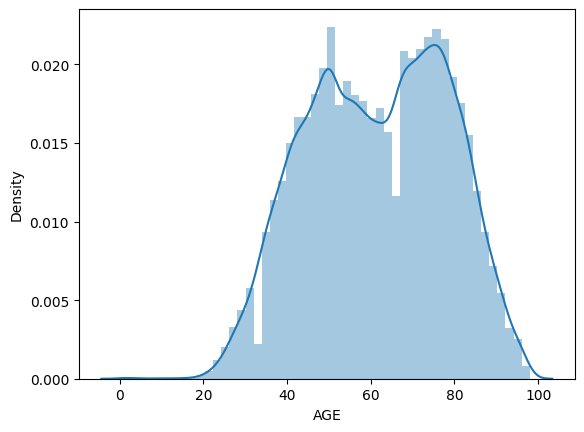

In [88]:
sns.distplot(numerical['AGE'])
plt.show()

In [89]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE'])) # or use np.median
#probably would be a bit better to use a predictive method here but this works

C:\Users\lilly\AppData\Local\Temp\ipykernel_17948\3426581607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['AGE'])
C:\Users\lilly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


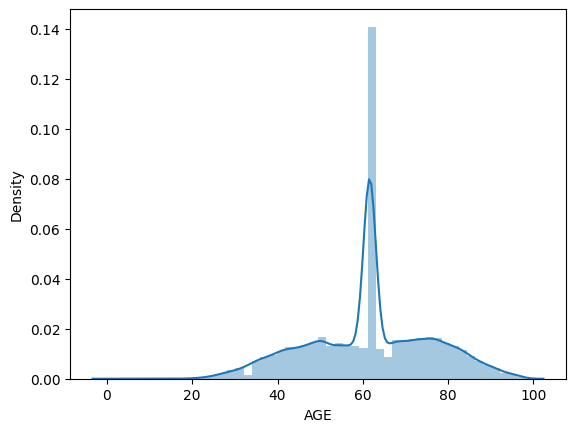

In [90]:
sns.distplot(numerical['AGE'])
plt.show()

In [91]:
np.mean(numerical['AGE'])

61.6116492675652

C:\Users\lilly\AppData\Local\Temp\ipykernel_17948\458945194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['INCOME'])
C:\Users\lilly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


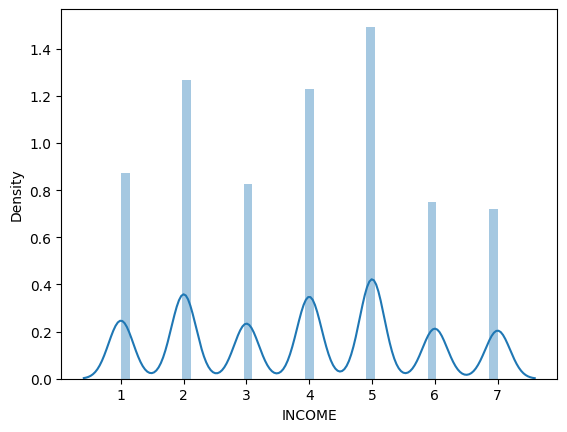

In [92]:
sns.distplot(numerical['INCOME']) 
plt.show()

In [93]:
# looks like the variable is actually categorical. We can verify it by using value_counts()
print(numerical['INCOME'].value_counts(dropna=False))
numerical['INCOME'] = numerical['INCOME'].astype(object)

INCOME
NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: count, dtype: int64


In [94]:
numerical.dtypes

ODATEDW       int64
TCODE         int64
DOB           int64
AGE         float64
INCOME       object
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2    float64
Length: 335, dtype: object

In [95]:
numerical['INCOME'] = numerical['INCOME'].fillna(5.0) # Replacing the null values with the most represented category
# earlier we did this by predicting INCOME from a number of other numeric fields

C:\Users\lilly\AppData\Local\Temp\ipykernel_17948\2601548513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2'])
C:\Users\lilly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


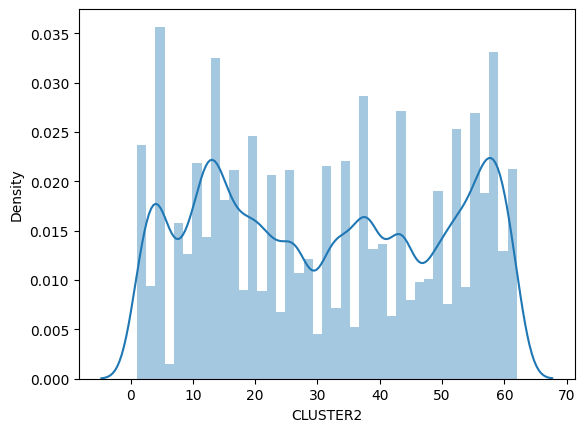

In [96]:
sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [97]:
numerical['CLUSTER2'].value_counts(dropna=False)

CLUSTER2
13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
46.0     644
29.0     569
40.0     369
6.0      211
NaN      132
Name: count, Length: 63, dtype: int64

In [98]:
np.mean(numerical['CLUSTER2'])

31.533711167086484

In [99]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

In [100]:
np.ceil(np.mean(numerical['CLUSTER2']))

32.0

In [ ]:
sns.distplot(numerical['CLUSTER2']) 
plt.show()

### Activity 2.3

### Activity 2.3

In [101]:
numerical.WEALTH2.value_counts(dropna=False)

WEALTH2
NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: count, dtype: int64

In [ ]:
sns.displot(numerical['WEALTH2']) 
#sns.distplot(numerical[numerical['WEALTH2'].isna()==False]['WEALTH2']) 
plt.show()

In [102]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')
numerical['WEALTH2'] = numerical['WEALTH2'].fillna('5.0') # median

In [ ]:
sns.distplot(numerical['WEALTH2']) 
plt.show()

In [ ]:
sns.distplot(numerical['TIMELAG']) 
plt.show()

In [103]:
numerical['TIMELAG'].median()

6.0

In [ ]:
# but 0.0 is even better: NaN could very well meen that they only made one donation so far
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(0.0)

In [ ]:
sns.distplot(numerical['TIMELAG']) 
plt.show()

# Lab 2

ADD HERE CODE FOR LAB 2

# Wrapping up

In [104]:
numerical = numerical.drop(columns=drop_list)

In [105]:
drop_list

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_11',
 'ADATE_12',
 'ADATE_14',
 'ADATE_16',
 'ADATE_18',
 'MAXADATE']

In [106]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
5,WEALTH1,44732
135,MSA,132
136,ADI,132
137,DMA,132
315,NEXTDATE,9973
316,TIMELAG,9973


In [ ]:
numerical.to_csv('numerical7_02.csv', index=False)
categorical.to_csv('categorical7_02.csv', index=False)

In [ ]:
Y.to_csv('target7_02.csv')

In [ ]:
# alternative:
# numerical.to_pickle('numerical7_02.p')
# categorical.to_pickle('categorical7_02.p')
# Y.to_pickle('target7_02.p')